In [1]:
(ql:quickload "kenzo")
(in-package :cat)

To load "kenzo":
  Load 1 ASDF system:
    kenzo
; Loading "kenzo"



#<PACKAGE "CAT-7">

# Simplicial Sets

## Introduction

A *simplicial set* (**J. Peter May**, Simplicial objects in Algebrac Topology, University of Chicago press, 2nd edition, 1992) $K$ is a union $K={\displaystyle{\bigcup_{q\ge 0}{K^q}}}$, where the $K^q$ are disjoints sets, together with functions

$$\partial_i^q: K^q \longrightarrow K^{q-1},\quad q>0,\quad i=0,\ldots , q,$$

$$\eta_i^q: K^q \longrightarrow K^{q+1},\quad q\ge 0,\quad i=0,\ldots ,q,$$

subject to the relations

$$
\begin{aligned}
\partial_i^{q-1}\partial_j^q & = & \partial_{j-1}^{q-1}\partial_i^q, & &   i < j \cr
\eta_i^{q+1}\eta_j^q         & = & \eta_j^{q+1}\eta_{i-1}^q,         & & i > j    \cr
\partial_i^{q+1}\eta_j^q     & = & \eta_{j-1}^{q-1}\partial_i^q,     & & i < j  \cr
\partial_i^{q+1}\eta_i^q     & = & \partial_{i+1}^{q+1}\eta_i^q  & = \mbox{Identity}, & \cr
\partial_i^{q+1}\eta_j^q     & = & \eta_j^{q-1}\partial_{i-1}^q,     & &  i > j+1.\cr 
\end{aligned}
$$

An element of $K^q$ is an (*abstract*) $q$-simplex of $K$ and the functions $\partial$ and $\eta$ are respectively the *face operators* and the *degeneracy operators*. Formally, their action on a simplex is very simple. For instance, if a $q$-simplex is an ordered set of vertices, like $\lbrace v_0, v_1, \ldots,v_i,\ldots, v_q \rbrace$, the rules are the following (we omit the indication of the dimension of the simplex):

$$
\begin{aligned}
\partial_i \lbrace v_0, v_1, \ldots,v_i,\ldots, v_q \rbrace & = &
           \lbrace v_0, v_1, \ldots,{\bf v_{i-1}}, {\bf v_{i+1}},\ldots, v_q \rbrace, \\
\eta_i \lbrace v_0, v_1, \ldots,v_i,\ldots, v_q \rbrace & = &
      \lbrace v_0, v_1, \ldots,{\bf v_i},{\bf v_i},\ldots, v_q \rbrace.
\end{aligned}
$$

The operators $\partial_i^q$ will be used hereafter to define the boundary operator $d^q$ for the $q$-component of the associated chain complex:

$$d^q = \sum_{i=0}^q { (-1)^i \partial_i^q}.$$

The image of a simplex under some $\eta$ is called *degenerate*, because it
is not directly implied  in the realization of the simplicial set.

### Example

Let us take the small example *diabolo* from the chapter 1. For a better understanding, it is convenient to use a list representation for the simplices. So the set $K^0$ of 0-simplices (vertices) is:

$$\lbrace (0), (1),\ldots (5) \rbrace.$$

The set $K^1$ of 1-simplices contains the set of regular simplices:

$$\lbrace (0\  1), (0\  2), (1\  2), (2\  3), (3\  4), (3\  5), (4\  5) \rbrace,$$

but also the degenerate 1-simplices:

$$\lbrace (0\ 0), (1\ 1), (2\ 2),\ldots,(5 \ 5) \rbrace.$$

The set $K^2$ of 2-simplices contains the regular singleton:  

$$\lbrace ( 3\  4\  5) \rbrace$$

but also the degenerate 2-simplices:

$$\lbrace (0\ 0\ 0), \ldots, (5\ 5\ 5), (0\ 0\ 1), (0\ 0\  2), (1\ 1\ 2),\ldots, (4\ 5\ 5)\rbrace.$$

The sets $K^q$ ($q >2$) contain only degenerate simplices. With this  naming of the elements of a $q$-simplex, the action of $\partial$ and $\eta$ is now clear. For instance

$$\partial_0 (0\  1) = (1),\  \partial_1 (0\  1) = (0),$$

$$\eta_0 (0\  1) = (0\  0\  1),\ 
  \eta_1 (1\  2)= (1\  2\  2),\ \eta_2(3\ 4\ 5)=(3\ 4\ 5\ 5). $$

By the way, we see that, in this case, a simplex is non-degenerate if the list is strictly increasing.

## Notion of abstract simplex in this Lisp implementation

In this implementation, on account of the essential following property: *any simplex
may be expressed in an unique way as a possibly iterated degeneracy of a non-degenerate simplex*, we call an **abstract simplex**, (in short **absm**), a pair consisting of:
- a (possibly iterated) degeneracy operator,
- a "geometric" simplex, i.e. a non-degenerate simplex.
For instance, if $\sigma$ is a non-degenerate simplex, and $\sigma'$ is the degenerate simplex  $\eta_3\eta_1\sigma$, the corresponding abstract simplices are respectively $\lbrace \emptyset, \sigma \rbrace$ and $\lbrace \eta_3\eta_1, \sigma \rbrace$.

An abstract simplex is represented internally in the system by the following lisp object:
```commonlisp
#S(ABSM :DGOP n :GMSM any)
```
where,

1. *dgop* is a non-negative integer coding a *strictly decreasing integer list*. This strictly  decreasing list of integers represents a sequence of $\eta$ operators and is coded as a **unique** integer as follows. The iterated degeneracy operator $\eta_{i_k} \ldots \eta_{i_1}$ is coded as the integer $\sum_{j = 1}^k 2^{i_j}$; in other words we use a binary number where the binary digits 1 correspond to the indices of the $\eta_i$'s. This is made possible by the *strictly* decreasing  property of the indices. For example the degeneracy operator $\eta_6 \eta_3 \eta_0$ is coded by the integer 73, for $73 = 2^6 + 2^3 + 2^0$. This leads to a compact coding, replacing the numerous operations about degeneracy operators by efficient handlings of bits of fixnums. In particular, 0 codes the void composition of degeneracy operator, that is, the identity operator. Two functions are provided to help the user for the transformation in both directions.
2. *gmsm* is a geometric simplex,  i.e. any kind of lisp object modelizing a non-degenerate simplex. For practical reason, a  type `GMSM`, (any kind of lisp object), has been defined.

The simplest constructor is the macro `(absm (dgop-ext-int` *dgop-list*`)`  *gmsm*`)`, where *dgop-list* is a strictly decreasing integer list. A structure class `ABSM` has been defined. The associated printing method prints such an object under the form:
$$\texttt{<AbSm}\quad\mathit{ext-dgop}\quad\mathit{gmsm}{\texttt >}$$
where *ext-dgop* shows clearly the sequence of the operators $\eta_i$ (see the examples). The accessor functions for the components are the macros `dgop` and `gmsm`.

### Simple functions for abstract simplices

`dgop-ext-int` *ext-dgop* *\[Function\]*
> Code on an integer the valid list representing the degeneracy operator *ext-dgop*.

`dgop-int-ext` *dgop* *\[Function\]*
> Give the list representing a degeneracy operator from the integer *dgop*.

`absm` *dgop gmsm* *\[Macro\]*
> Create an abstract simplex, using directly the coded representation, *dgop*, of the degeneracy operator.

`dgop` *absm* *\[Macro\]*
> Get the integer code of the internal representation of the degeneracy operator of the abstract simplex *absm*.
 
`gmsm` *absm* *\[Macro\]*
> Get the basic non-degenerate simplex part of the abstract simplex `absm`.

`absm-p` *object* *\[Predicate\]*
> Test if *object* is an abstract simplex.

### Examples

Let us suppose that `:sigma` "is" a geometric simplex, we may construct the abstract simplices of the beginning of the section.

In [2]:
(dgop-ext-int '(0))

1

In [3]:
(dgop-ext-int '(4 0))

17

In [4]:
(dgop-int-ext 63)

(5 4 3 2 1 0)

In [5]:
(dgop-ext-int '(2 2))

SIMPLE-ERROR: 
In DGOP-EXT-INT, the external dgop (2 2) is not decreasing.


NIL

In [6]:
(def asigma (absm 0 :sigma))

<AbSm - SIGMA>

In [7]:
(def asigma-prime (absm (dgop-ext-int '(3 1)) :sigma))

<AbSm 3-1 SIGMA>

In [8]:
(absm-p asigma-prime)

T

The following  command gives the sixth degeneracy of the vertex 0 represented as `(0)`.

In [9]:
(def deg-6 (absm (dgop-ext-int '(5 4 3 2 1 0)) '(0)))

<AbSm 5-4-3-2-1-0 (0)>

In [10]:
(dgop deg-6)

63

In [11]:
(gmsm deg-6)

(0)

## Representation of a simplicial set

A simplicial set is implemented as an instance of the class `SIMPLICIAL-SET`, subclass of the class `COALGEBRA`.

```commonlisp
(DEFCLASS SIMPLICIAL-SET (coalgebra)
    ((face :type face :initarg :face :reader face1)))

```

This class inherits also from the class `CHAIN-COMPLEX` and has one slot of its own:

>`face`, a lisp function  computing any face of any geometric simplex of the simplicial set.
This is a function with 3 arguments: a face index (a non--negative integer, `indx`), a simplex dimension (a positive integer, `dmns`) and a geometric simplex (`gmsm`), the $indx$-th face of which is looked for. Whatever the face simplex is, degenerate or not, the simplex returned by this function must be an **abstract** simplex, i.e. an `ABSM` object.

A printing method has been associated to the class `SIMPLICIAL-SET` and the external representation of  an instance is a string like `[K`*n* `Simplicial-Set]`, where $n$ is the number plate of the Kenzo object.

## The function `build-smst`

To facilitate the construction of instances of the class `SIMPLICIAL-SET`, the program `Kenzo` provides the function `build-smst` defined with keyword parameters:

```commonlisp
(build-smst :cmpr cmpr :basis basis :bspn bspn :face face
            :face* face* :intr-bndr intr-bndr :bndr-strt bndr-strt
            :intr-dgnl intr-dgnl :dgnl-strt dgnl-strt :orgn orgn
```

The returned value is an object of type `SIMPLICIAL-SET`. This function assigns an identification number `idnm` to the Kenzo object instance in a sequential way and pushes this object on the list of already  created simplicial sets instances, `*smst-list*`.

The keywords parameters are:
- *cmpr*, a comparison function for generators. 
- *basis*, if the simplicial set is effective, this argument must be the lisp function returning the  list of non-degenerate simplices  of the simplicial set, in a given dimension; if the simplicial set is locally effective, this argument must be the keyword `:locally-effective`.
- *bspn*, the lisp representation of the base point (an item of type `GMSM`). This is in fact the slot `bsgn` of the associated chain complex.
- *face*, a lisp function for the face operators.
- $face*$, a lisp function for the face operators, returning the symbol `:degenerate` if the corresponding face is degenerate.
- *intr-bndr*, a lisp function for the differential of the associated chain complex.
- *bndr-strt*, the strategy (`:cmbn` or `:gnrt`) for the function *intr-bndr*.
- *intr-dgnl*, a lisp function for the coproduct of the coalgebra.
- *dngl-strt*, the strategy (`:cmbn` or `:gnrt`) for the function *intr-dgnl*.
- *org*, the comment list, adequately chosen.

The three arguments $face*$,  *intr-bndr* and *intr-dgnl* are not mandatory. Only the function *face* is necessary to define precisely the simplicial set. From the function *face*, we know that we may construct:
- The differential for the associated chain complex, according to the formula:
$$d^q = \sum_{i=0}^q { (-1)^i \partial_i^q}.$$
- The coproduct of the underlying coalgebra (the Alexander-Whitney diagonal, $\Delta$) according to the formula:
$$\Delta(\sigma)= \sum_{i=0}^{n}{{\tilde{\delta}}^{(i)}\sigma \otimes \delta_0^{(i)} \sigma},$$
where the power $(i)$ denotes the $i$-th composition of the operator and $\tilde{\delta}$ is the
*last face* operator, so that
$$
\widetilde{\delta}^{(i)} = \partial_{n-i+1} \circ \cdots \circ \partial_n \\
\widetilde{\delta}_0^{(i)} = \partial_0 \circ \cdots \circ \partial_{i-1}
$$

But, as the differential ignore degenerate faces, it could be interesting for the user to provide a face function, weaker than the function *face* but sufficient and more efficient to compute the boundary of a simplex. It is the raison d'etre of the parameter $face*$ which may be used as an alternative to *face*. In both cases, the strategy is set to `:gnrt` by the system. It may also arrive that the user knows a particularly simple form for the differential, he may then use the parameter *intr-bndr*. In the computation of differentials in the associated chain complex, this function will be used instead of the canonical differential computed from the face function. In this last case, the user is required to provide the strategy. Same remark for the parameter *intr-dgnl*.

### Examples

As first example, we give the construction of the simplicial set $\Delta^n$  corresponding to the 
standard $n$-simplex. This is given only as example. The program `Kenzo` provides a function
for the same purpose which will be described later. For every simplex, we shall use a list representation as in our first example `diabolo`. The various keyword arguments for the call to `build-smst`, are:

1. *bspn*, the list `(0)`, i.e. the representation of the vertex 0.
2. *cmpr*, the lisp function  `#'l-cmpr`, since this function is adequate to compare the lists representing the simplices.
3. *basis*, the lisp function returning the list of all possible non-degenerate simplices in some dimension. Here, this is the combinatory function returning the set of all the lists of $p+1$ objects taken among $n+1$. Such a function is for instance the function  (`delta-inj` *p n*) whose definition is given hereafter. So, the `:basis` keyword argument is simply: `#'(lambda(dmn) (delta-inj dmn n))`. Note that here the binding of `n` is defined outside the $\lambda$-expression, which requires a *closure* for the implementation of this $\lambda$-expression.
4. *face*, the lisp function for the face operators (`face-delta-n`). It consists simply in removing the $i$-th element of the list describing a simplex ($i$ starting at 0).
5. *org* will be a comment.

In [12]:
(defun delta-inj (m n)
  (declare (type fixnum m n))
  (cond ((> m n) +empty-list+)
        ((zerop m) (mapcar #'list (<a-b> 0 n)))
        (t (mapcan #'(lambda (list)
                       (declare (type list list))
                       (mapcar #'(lambda (k)
                                   (declare (type fixnum k))
                                   (cons k list))
                                 (<a-b< 0 (first list))))
                     (delta-inj (1- m) n)))))

DELTA-INJ

In [13]:
(delta-inj 0 3)

((0) (1) (2) (3))

In [14]:
(delta-inj 1 3)

((0 1) (0 2) (1 2) (0 3) (1 3) (2 3))

In [15]:
(delta-inj 3 3)

((0 1 2 3))

In [16]:
(def face-delta-n
  #'(lambda (i dmn gsm)
      (declare (ignore dmn))
      (absm 0 (append (subseq gsm 0 i)
                      (subseq gsm (1+ i))) )))

#<FUNCTION (LAMBDA (I DMN GSM) :IN "/home/jovyan/.cl-jupyter-master/cl-jupyter.lisp") {5321EDFB}>

To create $\Delta^n$ for any order $n$, we embed the call of `build-smst` in a function having $n$ as parameter.

In [17]:
(defun delta-n (n)
  (declare (type fixnum n))
        (build-smst :cmpr #'l-cmpr
                    :basis #'(lambda(dmn)(delta-inj dmn n))
                    :bspn '(0)
                    :face face-delta-n
                    :orgn `(delta-n ,n)))

DELTA-N

In [18]:
(def delta4 (delta-n 4))

[K1 Simplicial-Set]

In [19]:
(bspn delta4)

(0)

In [20]:
(basis delta4 0)

((0) (1) (2) (3) (4))

In [21]:
(basis delta4 3)

((0 1 2 3) (0 1 2 4) (0 1 3 4) (0 2 3 4) (1 2 3 4))

A second example is the contruction of the simplicial complex  $\Delta^\mathbb{N}$ freely generated by the positive integers. The construction of the `SIMPLICIAL-SET` instance to implement this simplicial set is quite similar to that of $\Delta^n$, but in this case the `:basis` keyword argument is  the keyword `:locally-effective`, since the sets $K^q$ are infinite. Whence, the definition of $\Delta^\mathbb{N}$:

In [22]:
(def delta-infty
        (build-smst :cmpr #'l-cmpr
                    :basis :locally-effective
                    :bspn '(0)
                    :face face-delta-n
                    :orgn `(delta-infinity)))

[K6 Simplicial-Set]

A third example is the construction of the simplicial set corresponding to `diabolo`. This simplicial set is a  sub-complex of $\Delta^5$. The `:face` function is exactly the same as in the examples above and the `:basis` function returns the sub-simplices of `diabolo`, by enumeration. 

In [23]:
(def diabolo-ss 
        (build-smst :cmpr #'l-cmpr
                    :basis  #'(lambda (dmn)
                                (case dmn
                                      (0 '((0)(1)(2)(3)(4)(5)))
                                      (1 '((0 1)(0 2)(1 2)(2 3)(3 4)(3 5)(4 5)))
                                      (2 '((3 4 5)))))
                    :bspn '(0)
                    :face face-delta-n
                    :orgn '(simplicial set for diabolo)))

[K11 Simplicial-Set]

## A first set of helpful functions on simplicial sets

We give now a first set of functions, methods or macros acting on  simplicial set instances. 

`cat-init` *\[Function\]*
> Clear in particular `*smst-list*`, the list of user created simplicial sets  and reset the global counter to 1.

`smst` *n* *\[Function\]*
> Retrieve in the list `*smst-list*` the simplicial set instance whose the Kenzo identification
is $n$. If it does not exist, return `NIL`.

`a-cmpr3` *smst absm1 absm2* *\[Function\]*
> Compare the abstract simplices *absm1* and *absm2* with the comparison function associated with the simplicial set *smst*.

`bspn` *smst* *\[Macro\]*
> Return the base point of the simplicial set *smst*.

`bndr`  *smst* `&rest` *\[Macro\]*
> Identical to the macro `dffr` (see the chain complex chapter). For simplicial sets, it is more traditional to use the term *boundary*.

`dgnl` *smst* `&rest` *\[Macro\]*
> Identical to  the macro `cprd` (see the coalgebra chapter). For simplicial sets, this recalls the 
Alexander-Witney diagonal.

`face` *smst i k  gmsm-or-absm* *\[Macro\]*
> Versatile macro to apply the face operator $\partial_i^k$ on the simplex *gmsm-or-absm* of the simplicial set *smst*. The name of the simplex parameter shows clearly that it may be either a geometric simplex or an abstract simplex. With only one argument (*smst*), return the function *face*. 
In any other case, we recall that this application   returns always  an object of type `ABSM`.

`degenerate-p` *absm* *\[Macro\]*
> Return `t` if the abstract simplex *absm* is degenerate, `nil` otherwise.

`non-degenerate-p` *absm* *\[Macro\]*
> Return `t` if the abstract simplex *absm* is non-degenerate, `nil` otherwise.

`check-smst` *smst dmns1* `&optional` *dmns2 (1+ dmns1)* *\[Function\]*
> Return `t` if the fundamental relations between the face operators $\partial_i^k$
with $k=dmns1,\ldots, dmns2-1$, applied on the effective simplicial set *smst*, are satisfied, otherwise `nil`. If the optional parameter *dmns2* is omitted, the test is done only for
$k=dmns1$.

## Examples

After having created instances of the standard simplicial sets $\Delta^2$ and $\Delta^3$ ($\Delta^\mathbb{N}$ has been defined previously), let us test some simple functions. Note that, since the class of simplicial sets is a sub-class of the class of coalgebras, itself subclass of chain complexes, the functions defined on these classes are available.

In [24]:
(def delta2 (delta-n 2))

[K16 Simplicial-Set]

In [25]:
(def delta3 (delta-n 3))

[K21 Simplicial-Set]

In [26]:
(degenerate-p (absm 0 '(1 2 3)))

NIL

In [27]:
(degenerate-p (absm 5 '(0 1 2 3 4)))

T

In [28]:
(basis delta3 2)

((0 1 2) (0 1 3) (0 2 3) (1 2 3))

In [29]:
(basis delta2 0)

((0) (1) (2))

  The set of simplices in any dimension for the simplicial set $\Delta^\mathbb{N}$ is infinite:

In [30]:
(basis delta-infty 1)

SIMPLE-ERROR: 
The object [K6 Simplicial-Set] is locally-effective.


NIL

Let us test the face function. We see that, though `delta-infty` is locally effective, nevertheless, we may work with its simplices:

In [31]:
(face delta-infty 2 4 '(0 1 2 3 4))

<AbSm - (0 1 3 4)>

In [32]:
(face delta-infty 2 4 (absm 0 '(0 1 2 3 4)))

<AbSm - (0 1 3 4)>

In [33]:
(face delta-infty 2 5 (absm (dgop-ext-int '(1)) '(0 1 2 3 4)))

<AbSm - (0 1 2 3 4)>

In [34]:
(face delta-infty 2 5 (absm (dgop-ext-int '(3)) '(0 1 2 3 4)))

<AbSm 2 (0 1 3 4)>

In [35]:
(bspn delta-infty)

(0)

The two following statement show that `delta-infty` may be considered also as a coalgebra and a chain complex.

In [36]:
(cprd delta-infty 4 '(0 1 2 3 4))


----------------------------------------------------------------------{CMBN 4}
<1 * <TnPr (0) (0 1 2 3 4)>>
<1 * <TnPr (0 1) (1 2 3 4)>>
<1 * <TnPr (0 1 2) (2 3 4)>>
<1 * <TnPr (0 1 2 3) (3 4)>>
<1 * <TnPr (0 1 2 3 4) (4)>>
------------------------------------------------------------------------------


In [37]:
(? delta-infty 4 '(0 1 2 3 4))


----------------------------------------------------------------------{CMBN 3}
<1 * (0 1 2 3)>
<-1 * (0 1 2 4)>
<1 * (0 1 3 4)>
<-1 * (0 2 3 4)>
<1 * (1 2 3 4)>
------------------------------------------------------------------------------


The simplicial set `diabolo-ss`,  has also all the properties of a coalgebra and of a chain complex.

In [38]:
(basis diabolo-ss 1)

((0 1) (0 2) (1 2) (2 3) (3 4) (3 5) (4 5))

In [39]:
(basis diabolo-ss 2)

((3 4 5))

In [40]:
(? diabolo-ss 2 (first *))


----------------------------------------------------------------------{CMBN 1}
<1 * (3 4)>
<-1 * (3 5)>
<1 * (4 5)>
------------------------------------------------------------------------------


In [41]:
(? diabolo-ss *)


----------------------------------------------------------------------{CMBN 0}
------------------------------------------------------------------------------


In [42]:
(dgnl diabolo-ss **)


----------------------------------------------------------------------{CMBN 1}
<1 * <TnPr (3) (3 4)>>
<-1 * <TnPr (3) (3 5)>>
<1 * <TnPr (4) (4 5)>>
<1 * <TnPr (3 4) (4)>>
<-1 * <TnPr (3 5) (5)>>
<1 * <TnPr (4 5) (5)>>
------------------------------------------------------------------------------


## The function `build-finite-ss`

The function `build-finite-ss` is a powerful function simplifying the creation of a finite simplicial set. From the lisp point of view, it accepts only one argument, the structured list of the simplices and their faces. In this list, every non--degenerate simplex must be coded as a symbol given by the user.  The  structure of the list is the following:

- **0**    (in fact, optional)
- $<$Sequence of the vertices, the first item being the base point$>$,
- **1**
- $<$Sequence of description of simplices in dimension 1$>$,
- **2**
- $<$Sequence of description of simplices in dimension 2$>$,
-   ... ... ... ... ... ...
- **n**
- $<$Sequence of description of simplices in dimension n$>$.

where $<$Sequence of description of simplices in dimension k$>$ is a sequence of the following items:

1. A symbol, the symbolic name of the simplex.
2. A list of  faces of this simplex, describing the faces of the simplex. A face can be described in two ways:
  - a symbol, the symbolic name of a **non-degenerate** simplex composing itself the face.
  - or a list of the form  ($i_k\ i_{k-1}\ \ldots \ i_1 \ i_0$ `symbol`) meaning that the degeneracy $\eta_{i_k}\eta_{i_{k-1}}\ldots\eta_{i_1}\eta_{i_0}$ is to be applied to the non-degenerate simplex of name `symbol`  to produce the actual (possibly degenerate) face. If the simplex face has dimension 0 (a vertex), the name of this vertex is sufficient in the face description because the program computes itself the unique possible degeneracy of the vertex, i.e. $\eta_{k-2}\ldots\eta_0$. 

### Examples

Let us give some examples to clarify the use of `build-finite-ss`. In the first example, we use  `build-finite-ss` to create a simplicial complex, corresponding to a triangulation of the torus. As the faces are never degenerated, the description of the faces is of simplified form.

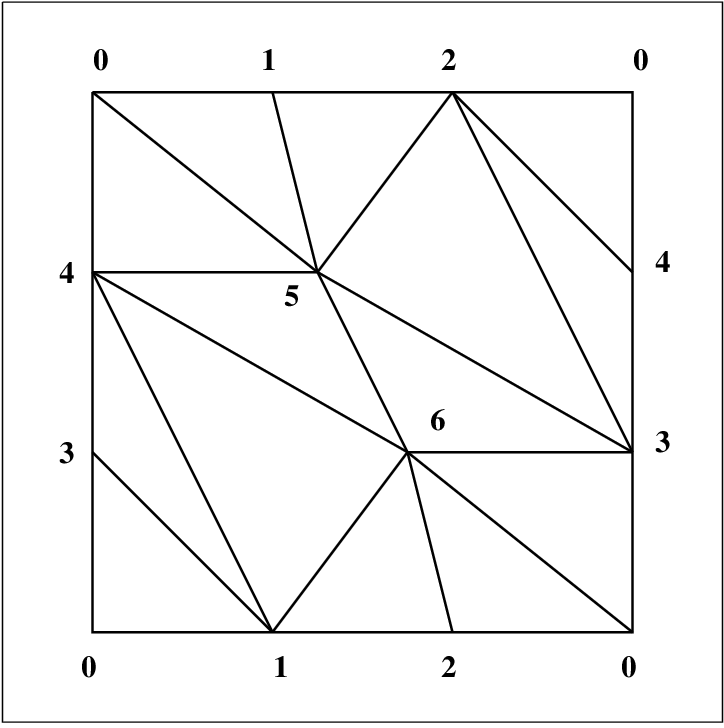

In [43]:
(cl-jupyter-user:png-from-file "torus2.png")

The vertices will be named `v0`, `v1`, ..., `v6`, `v0` being the base point. The edges
will be named `e01`, `e02`, ...,  `e56`, the list of faces of the edge $e_{ij}$ being
$(v_j\  v_i)$. The triangles will be named `t013`, `t015`, ..., `t456`, the list of faces of
the triangle $t_{ijk}$ being $(e_{jk}\  e_{ik}\  e_{ij})$. With this convention of describing the simplices, the call to `build-finite-ss` is in simplified form:

In [44]:
(def torus2
    (build-finite-ss 
       '(v0  v1  v2  v3  v4  v5  v6 

         1 e01  (v1 v0)   e02  (v2 v0)   e03  (v3 v0)
           e04  (v4 v0)   e05  (v5 v0)   e06  (v6 v0)
           e12  (v2 v1)   e13  (v3 v1)   e14  (v4 v1)
           e15  (v5 v1)   e16  (v6 v1)   e23  (v3 v2)
           e24  (v4 v2)   e25  (v5 v2)   e26  (v6 v2)
           e34  (v4 v3)   e35  (v5 v3)   e36  (v6 v3)
           e45  (v5 v4)   e46  (v6 v4)   e56  (v6 v5)

         2 t013  (e13 e03 e01)  t015  (e15 e05 e01)  t024  (e24 e04 e02)
           t026  (e26 e06 e02)  t036  (e36 e06 e03)  t045  (e45 e05 e04)
           t125  (e25 e15 e12)  t126  (e26 e16 e12)  t134  (e34 e14 e13)
           t146  (e46 e16 e14)  t234  (e34 e24 e23)  t235  (e35 e25 e23)
           t356  (e56 e36 e35)  t456  (e56 e46 e45)  )))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {10040BA85B}>
2. BSGN: V0
3. DFFR: [K27 Morphism (degree -1): K26 -> K26]
4. GRMD: [K26 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 26
7. ORGN: (BUILD-FINITE-SS (V0 V1 V2 V3 V4 V5 V6 1 E01 (V1 V0) ...))
8. CPRD: [K30 Morphism (degree 0): K26 -> K28]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {10040BA87B}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K26 Simplicial-Set]

After verification of the coherence of the description of the faces, the function `build-finite-ss` calls adequately the function `build-smst` to create an instance of the class `SIMPLICIAL SET` subclass of the class `CHAIN COMPLEX`. So that, it is easy for the user  to obtain the homology groups of the torus, for instance in dimension 1:

In [45]:
(chcm-homology  torus2 1)


Computing boundary-matrix in dimension 1.
Rank of the source-module : 21.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/21 (dimension 1) :
E01 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/21 (dimension 1) :
E02 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 3/21 (dimension 1) :
E03 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 4/21 (dimension 1) :
E04 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 5/21 (dimension 1) :
E05 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 6/21 (dimension 1) :
E06 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 7/21 (dimension 1) :
E12 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the gen

NIL

The function `build-finite-ss` calls internally some verification functions mentioned above to verify the coherence of the description of the simplicial set and gives an error message if the description of the simplicial set is incorrect. For instance:

In [46]:
(def mm (build-finite-ss 
   '(s0 s1 s2 s3 
     1 0-1 (s1 s0)  1-2 (s2 s1)  2-3 (s3 s2)
     2 0-1-2 (2-3 1-2 0-1))
  ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {10041AFA9B}>
2. BSGN: S0
3. DFFR: [K32 Morphism (degree -1): K31 -> K31]
4. GRMD: [K31 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 31
7. ORGN: (BUILD-FINITE-SS (S0 S1 S2 S3 1 |0-1| (S1 S0) |1-2| (S2 S1) |2-3| ...))
8. CPRD: [K35 Morphism (degree 0): K31 -> K33]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {10041AFABB}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

SIMPLE-ERROR: 
Noncoherent boundary operators detected by CHECK-FACES :
Simplex => 0-1-2
del_0 o del_0 => <AbSm - S3>
del_0 o del_1 => <AbSm - S2>


NIL

In the following examples, we show the power of `build-finite-ss` for the description of classical surfaces as simplicial sets, and in each case we  verify the well known homology groups of those surfaces. The examples of the torus or the dunce-hat must be compared, as to the simplicity of the definition, to the respective ones in the previous page and in the Homology chapter.

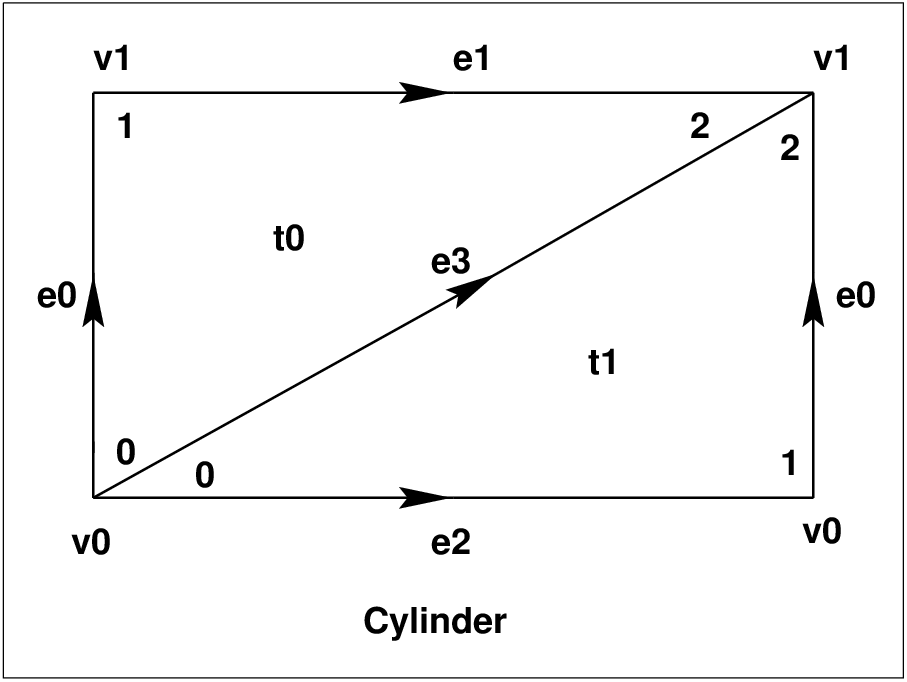

In [47]:
(cl-jupyter-user:png-from-file "cylinss.png")

In [48]:
(def cylinss (build-finite-ss 
    '(v0 v1 
      1 e0 (v1 v0) e1 (v1 v1) e2 (v0 v0) e3 (v1 v0)
      2 t0 (e1 e3 e0) t1 (e0 e3 e2)) ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {100432ACCB}>
2. BSGN: V0
3. DFFR: [K37 Morphism (degree -1): K36 -> K36]
4. GRMD: [K36 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 36
7. ORGN: (BUILD-FINITE-SS (V0 V1 1 E0 (V1 V0) E1 (V1 V1) E2 (V0 V0) E3 ...))
8. CPRD: [K40 Morphism (degree 0): K36 -> K38]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {100432ACEB}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K36 Simplicial-Set]

In [49]:
(dotimes (i 3) (chcm-homology cylinss i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 2.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/2 (dimension 0) :
V0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/2 (dimension 0) :
V1 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 4.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/4 (dimension 1) :
E0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/4 (dimension 1) :
E1 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 3/4 (dimension 1) :
E2 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 4/4 (dimension 1) :
E3 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 4.



NIL

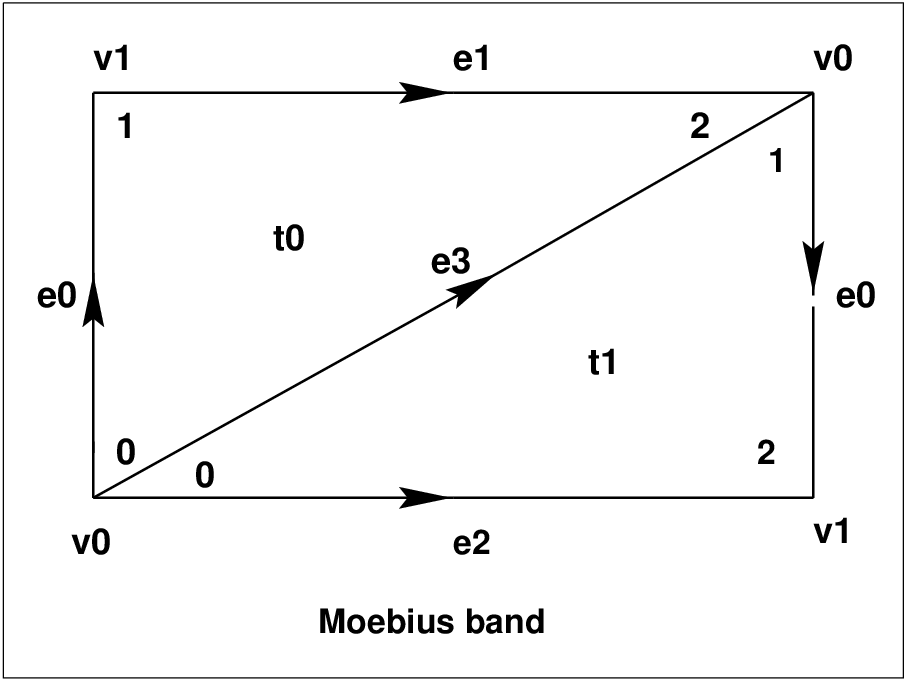

In [50]:
(cl-jupyter-user:png-from-file "moebiuss.png")

In [51]:
(def moebiuss (build-finite-ss 
  '(v0 v1 
    1 e0 (v1 v0) e1 (v0 v1) e2 (v1 v0) e3 (v0 v0)
    2 t0 (e1 e3 e0) t1 (e0 e2 e3)) ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {100454B0FB}>
2. BSGN: V0
3. DFFR: [K42 Morphism (degree -1): K41 -> K41]
4. GRMD: [K41 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 41
7. ORGN: (BUILD-FINITE-SS (V0 V1 1 E0 (V1 V0) E1 (V0 V1) E2 (V1 V0) E3 ...))
8. CPRD: [K45 Morphism (degree 0): K41 -> K43]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {100454B11B}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K41 Simplicial-Set]

In [52]:
(dotimes (i 3) (chcm-homology moebiuss i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 2.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/2 (dimension 0) :
V0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/2 (dimension 0) :
V1 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 4.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/4 (dimension 1) :
E0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/4 (dimension 1) :
E1 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 3/4 (dimension 1) :
E2 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 4/4 (dimension 1) :
E3 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 4.



NIL

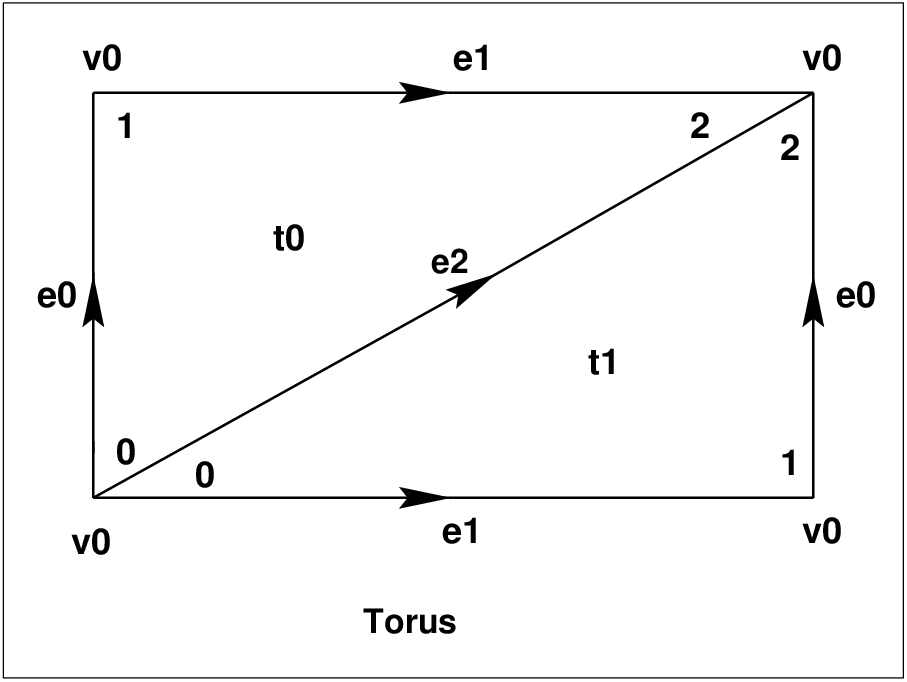

In [53]:
(cl-jupyter-user:png-from-file "toruss.png")

In [54]:
(def toruss (build-finite-ss 
  '(v0
    1 e0 (v0 v0) e1 (v0 v0) e2 (v0 v0)
    2 t0 (e1 e2 e0) t1 (e0 e2 e1)) ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {1004881EDB}>
2. BSGN: V0
3. DFFR: [K47 Morphism (degree -1): K46 -> K46]
4. GRMD: [K46 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 46
7. ORGN: (BUILD-FINITE-SS (V0 1 E0 (V0 V0) E1 (V0 V0) E2 (V0 V0) 2 T0 ...))
8. CPRD: [K50 Morphism (degree 0): K46 -> K48]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {1004881EFB}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K46 Simplicial-Set]

In [55]:
(dotimes (i 3) (chcm-homology toruss i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
V0 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 3.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/3 (dimension 1) :
E0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/3 (dimension 1) :
E1 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 3/3 (dimension 1) :
E2 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 3.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/3 (dimension 1) :
E0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/3 (dimension 1) :
E1 
End of computing.



NIL

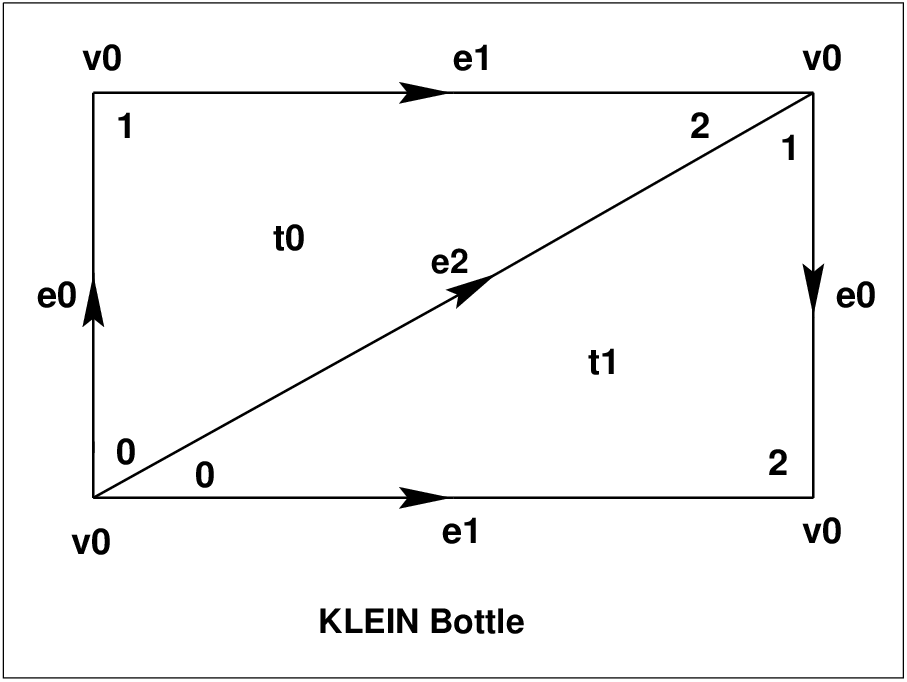

In [56]:
(cl-jupyter-user:png-from-file "bottless.png")

In [57]:
(def bottless (build-finite-ss 
  '(v0
    1 e0 (v0 v0) e1 (v0 v0) e2 (v0 v0)
    2 t0 (e1 e2 e0) t1 (e0 e1 e2)) ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {1004E8A4AB}>
2. BSGN: V0
3. DFFR: [K52 Morphism (degree -1): K51 -> K51]
4. GRMD: [K51 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 51
7. ORGN: (BUILD-FINITE-SS (V0 1 E0 (V0 V0) E1 (V0 V0) E2 (V0 V0) 2 T0 ...))
8. CPRD: [K55 Morphism (degree 0): K51 -> K53]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {1004E8A4CB}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K51 Simplicial-Set]

In [58]:
(dotimes (i 3) (chcm-homology bottless i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
V0 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 3.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/3 (dimension 1) :
E0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/3 (dimension 1) :
E1 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 3/3 (dimension 1) :
E2 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 3.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/3 (dimension 1) :
E0 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/3 (dimension 1) :
E1 
End of computing.



NIL

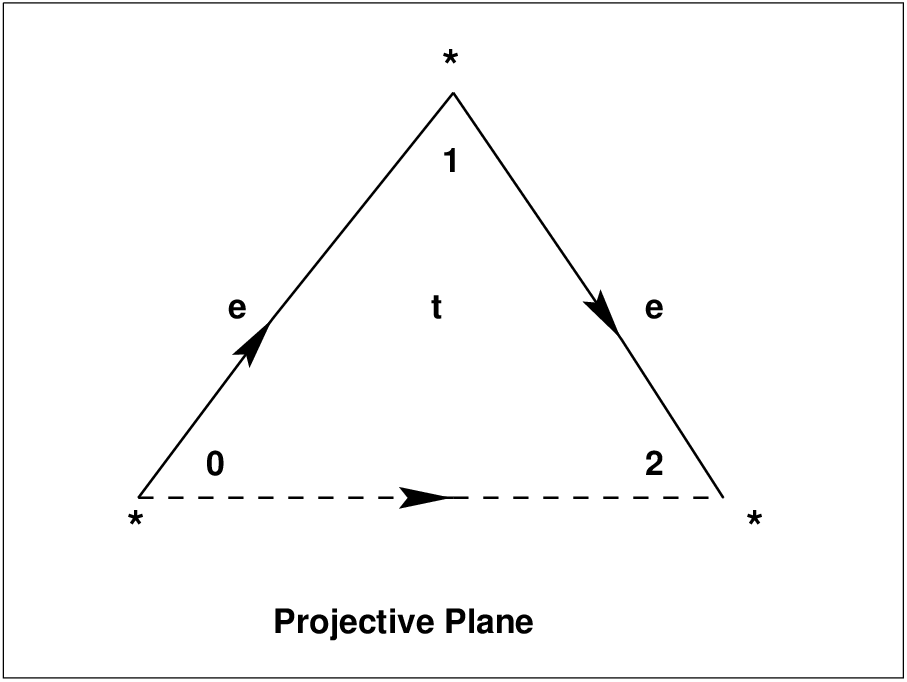

In [59]:
(cl-jupyter-user:png-from-file "ppss.png")

In [60]:
(def ppss (build-finite-ss 
  '( *
     1 e (* *)
     2 t (e * e)) ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {100559132B}>
2. BSGN: *
3. DFFR: [K57 Morphism (degree -1): K56 -> K56]
4. GRMD: [K56 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 56
7. ORGN: (BUILD-FINITE-SS (* 1 E (* *) 2 T (E * E)))
8. CPRD: [K60 Morphism (degree 0): K56 -> K58]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {100559134B}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K56 Simplicial-Set]

In [61]:
(dotimes (i 3) (chcm-homology ppss i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
* 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 1) :
E 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 1) :
E 
End of computing.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 2) :
T 
End of computing.




Homology in dimension 1 :


Component Z/2Z


---done---
Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.

NIL

The user will note that the list of faces for the 2-simplex `t`, is in simplified form. In particular, as the face 1 of `t` is the 0-degeneracy of the base point "$*$", it is sufficient to code the  face 1 of `t` by "`*`" instead of the complete form `(0 *)`.

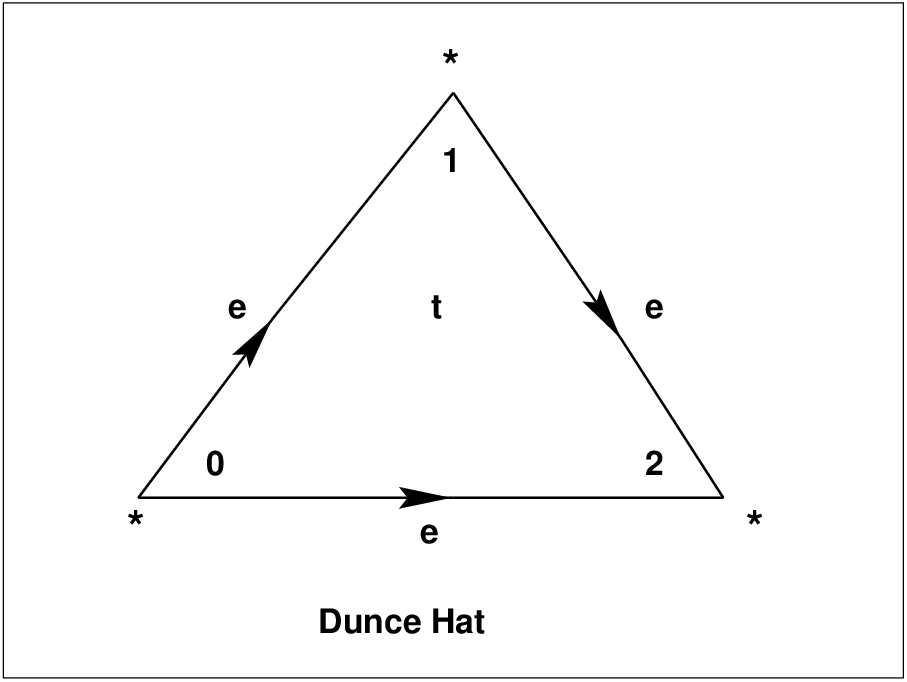

In [62]:
(cl-jupyter-user:png-from-file "duncess.png")

In [63]:
(def duncess (build-finite-ss 
  '( *
     1 e (* *)
     2 t (e e e)) ))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION S-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN FINITE-SS-BASIS) {1002A691EB}>
2. BSGN: *
3. DFFR: [K62 Morphism (degree -1): K61 -> K61]
4. GRMD: [K61 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 61
7. ORGN: (BUILD-FINITE-SS (* 1 E (* *) 2 T (E E E)))
8. CPRD: [K65 Morphism (degree 0): K61 -> K63]
9. FACE: #<CLOSURE (FLET RSLT :IN FINITE-SS-FACE) {1002A6920B}>
> 
Checking the 0-simplices...
Checking the 1-simplices...
Checking the 2-simplices...

[K61 Simplicial-Set]

In [64]:
(dotimes (i 3) (chcm-homology duncess i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
* 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 1) :
E 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 1) :
E 
End of computing.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 2) :
T 
End of computing.




Homology in dimension 1 :



---done---
Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the b

NIL

## Special simplicial sets

The system provides useful functions to create interesting simplicial sets of constant usage. In particular, the user is advised from now to use the following version of the standard simplex implemented in `Kenzo` and not the one given previously for simplicity reason.

### The standard simplex

`delta` *dmns* *\[Function\]*
> Create the standard simplex $\Delta^n$ with vertices $0,1,\ldots,n$, where *dmns* is the parameter for $n$. This simplicial set is so important in the applications that the implementor has decided to code the simplices in a  way similar to the coding
of the degeneracy operators. An increasing sequence of non-negative integers describing a simplex, is coded on a binary integer with the following convention: a number $i$ representing the vertex $i$ is the $(i+1)$--th binary bit of a machine word. The base point $0$ is the bit 1 in position 1 of the word. This representation is very efficient for saving memory space but somehow awkward to read.

`delta-infinity` *\[Function\]*
> Create the locally effective standard simplex $\Delta^\mathbb{N}$ freely generated by the positive integers.

`deltab` *\[Function\]*
> Create the locally effective *reduced* simplicial set $\bar \Delta$, built from $\Delta^\mathbb{N}$ by identifying all the vertices to the base point.

`deltab2` *\[Function\]*
> Create the locally effective *1-reduced* simplicial set $\Delta_2^\mathbb{N}$, obtained from the above $\bar \Delta$, by identification of all the edges with the base point. This is the efficient version of the coalgebra that is used as example in the cobar chapter.

`dlop-ext-int` *ext-dlop* *\[Function\]*
> Code on an integer the valid list (increasing order) representing the simplex *ext-dlop* of the standard simplex.

`dlop-int-ext` *dgop* *\[Function\]*
> Give the list representing a simplex of the standard simplex from the integer *dgop*.

`vertex-i` *absm i* *\[Function\]*
> Give the $i$-th vertex of the (coded, degenerate or not) abstract simplex `absm` belonging to a simplicial set of the $\Delta$ family.

`absm-ext-int` *vlist* *\[Function\]*
> Create a valid abstract simplex of the $\Delta$ family from the simplex *vlist* written as a non-decreasing list of non-negative integers (i.e coding of any degenerate or non--degenerate simplex of the $\Delta$ family).

`absm-int-ext` *absm* *\[Function\]*
> From an internal coded form of an abstract simplex of the $\Delta$ family, create the  non-decreasing list
of non--negative integers representing the canonical external form of such a simplex.

`soft-delta` *dmns* *\[Function\]*
> Create another version of the standard simplex $\Delta^n$ designed for a better clarity in the printing of the results at testing time. More precisely, the simplices are represented internally by a list of the form `(:delt` *binary-code*`)`. With this representation, the system is able to recognize a coded simplex and to print it in a readable form. For the user, the only
requirement is to write a simplex coded $n$ as `(d` *n*`)`, where `d` is the macro building the internal representation (see the examples). Attention: the above conversion functions do not work with this representation.

`soft-delta-infinity` *\[Function\]*

### Examples

In [65]:
(def d3 (delta 3))

[K66 Simplicial-Set]

The simplices $2$, $4$ and  $8$ are the coded representation of the vertices $1$, $2$ and $3$:

In [66]:
(cmpr d3 2 4)

:LESS

In [67]:
(cmpr d3 4 4)

:EQUAL

In [68]:
(cmpr d3 8 4)

:GREATER

The list returned by the following statement  getting the basis of $\Delta^3$ in dimension 2, namely `(7 11 13 14)` is in fact the coded list of the following simplices `((0 1 2) (0 1 3) (0 2 3) (1 2 3))`.

In [69]:
(basis d3 2)

(7 11 13 14)

In the following statement, the integer $21$ represents the simplex in dimension $2$, `(0 1 4)`, $1$ represents the operator $\partial_1$ and the face is therefore `(0 4)` represented as the integer $17$.

In [70]:
(face d3 1 2 21)

<AbSm - 17>

We may obtain the same result, using:

In [71]:
(face d3 1 2 (dlop-ext-int '(0 1 4)))

<AbSm - 17>

Let us test the conversion functions.

In [72]:
(vertex-i (absm 0 1) 0)

0

In [73]:
(vertex-i (absm 1 1) 0)

0

In [74]:
(vertex-i (absm 1 1) 1)

0

In [75]:
(vertex-i (absm 0 7) 2)

2

In [76]:
(absm-ext-int '(0 0 0 1 2 3 3 3))

<AbSm 6-5-1-0 15>

In [77]:
(absm-ext-int '(0 1 1 1 2))

<AbSm 2-1 7>

In [78]:
(absm-int-ext (absm-ext-int '(0 0 0 1 2 3 3 3)))

(0 0 0 1 2 3 3 3)

The following  call to the macro `?` returns the boundary of the simplex `(0 2 3)` of $\Delta^3$, the integers $5$, $9$ and $12$ representing respectively the simplices `(0 2)`, `(0 3)` and `(2 3)`. The application of the coproduct `dgnl` to the simplex `(0 1 2 3)`, coded $15$, is also easily interpreted:

In [79]:
(? d3 2 13)


----------------------------------------------------------------------{CMBN 1}
<1 * 5>
<-1 * 9>
<1 * 12>
------------------------------------------------------------------------------


In [80]:
(dgnl d3 3 15)


----------------------------------------------------------------------{CMBN 3}
<1 * <TnPr 1 15>>
<1 * <TnPr 3 14>>
<1 * <TnPr 7 12>>
<1 * <TnPr 15 8>>
------------------------------------------------------------------------------


We may show now some examples with the *soft* version of the standard simplex. Using the macro `d` and the function `dlop-ext-int` the user may work with a readable form of the simplices and the degeneracy operators.

In [81]:
(def d3 (soft-delta 3))

[K71 Simplicial-Set]

In [82]:
(cmpr d3 (d 2) (d 4))

:LESS

In [83]:
(basis d3 1)

((:DELT . 3) (:DELT . 5) (:DELT . 6) (:DELT . 9) (:DELT . 10) (:DELT . 12))

In [84]:
(dgnl d3 3 (d (dlop-ext-int '(0 1 2 3))))


----------------------------------------------------------------------{CMBN 3}
<1 * <TnPr (DELT . 1) (DELT . 15)>>
<1 * <TnPr (DELT . 3) (DELT . 14)>>
<1 * <TnPr (DELT . 7) (DELT . 12)>>
<1 * <TnPr (DELT . 15) (DELT . 8)>>
------------------------------------------------------------------------------


In [85]:
(face d3 1 2 (d (dlop-ext-int '(0 2 4))))

<AbSm - (DELT . 17)>

In [86]:
(? d3 2 (d (dlop-ext-int '(0 2 3))))


----------------------------------------------------------------------{CMBN 1}
<1 * (DELT . 5)>
<-1 * (DELT . 9)>
<1 * (DELT . 12)>
------------------------------------------------------------------------------


### Spheres, Moore spaces and projective spaces

`sphere` *n* *\[Function\]*
> Create a simplicial set, a model  for the sphere of dimension $n$, ($n \geq 0$). This is a typical example where the differential is known a priori to be null, so the `:intr-bndr` keyword parameter is set to function `zero-pure-dffr`. This function generates a name `S`*n* for the **unique** simplex of dimension $n$ whose faces are the degeneracies of the base point labelled "`*`".

`sphere-wedge` *dmns1 ... dmnsn* *\[Function\]*
> Create a simplicial set for a wedge of spheres. Here, the $dmns_i$ are integers, namely the dimensions of the spheres to be wedged. The differential is null. In the representation created by the program, the 0-simplex (base point) is labelled "`*`" and in dimension $p$ the simplices are labelled `S`*p*`-`*1*, ...,  `S`*p*`-`*s*,  where *s* is the number of spheres of dimension $p$ in the wedge. (See the example).

`moore` *p n* *\[Function\]*
> Construct a simplicial set, a model for  ${\rm Moore}(\mathbb{Z}/{p\mathbb{Z}},n)$. The integers $p$ and $n$ must satisfy  the conditions $p>1,\ n> 2p-4$, otherwise the result is undefined. ${\rm Moore}(\mathbb{Z}/{p\mathbb{Z}},n)$ is a space, whose the only non-null homology groups are $H_0=\mathbb{Z}$ and $H_n=\mathbb{Z}/{p\mathbb{Z}}$. A Moore space has only three non-degenerate simplices, namely in dimension $0$, $n$ and $n+1$. A number $p$ of faces of the  $(n+1)$-simplex are identified with the $n$-simplex, the others faces being contracted on the base point. In the  representation created by the software, the 0-simplex (base point), the $n$-simplex and the $(n+1)$-simplex are respectively labelled "`*`", `M`$n$ and `N`$n'$, where $n'=n+1$.

`R-proj-space &rest` *\[Function\]*
> Accepts zero, one or two arguments for parameters $k$ and $l$. A single positive `FIXNUM` argument is interpreted as a value for *k*. Two positive `FIXNUM` arguments will be assigned to parameters $k$ and $l$, such that $k\leq l$. If $k=1$ or omitted, build a simplicial set model of $K(\mathbb{Z}_2,1)= P^\infty\mathbb{R}$. In dimension $n$, this simplicial set has only one non-degenerate simplex, namely the integer $n$. The faces of this non-degenerate simplex $n$ are given by the following formulas: $\partial_0 n = \partial_n n = n-1$ and for $i \not= 0$ and $i \not=n$,  $\partial_i n= \eta_{i-1} (n-2)$. If $k >1$, build an analogous simplicial set but with no simplices in dimensions $1 \leq m < k$. If in addition to an argument for $k$ an argument for $l$ ($l \geq k$) is provided, build an analogous simplicial set but with no simplices in dimensions $m \geq l$.

### Examples

Let us define first, an auxiliary function `show-structure` with 2 arguments *ss* and *dmn*, to show the structure (i.e. generators and faces) of the simplicial set *ss*, from the dimension 0 up to the dimension *dmn* included.

```commonlisp
(defun show-structure (ss dmn)
 (dotimes (i (1+ dmn))
   (format t "~2%Dimension = ~D :" i)
   (case i
     (0 (format t "~2%~8TVertices : ~8T~A" (basis ss 0)))
     (otherwise
        (dolist (s (basis ss i))
            (format t "~2%~8TSimplex : ~A~2%~16TFaces : ~A"
                    s (mapcar #'(lambda (j) (face ss j i s))
                                (<a-b> 0 i)))))
  )))
```

In these elementary examples, we show the structure of some simplicial sets built
from the functions above. Let us begin with $S^2$.

In [87]:
(def s2 (sphere 2))

[K76 Simplicial-Set]

In [88]:
(bspn s2)

*

Applying the function `basis`, we see that the only non-null simplices are in dimension 0 and 2.

In [89]:
(dotimes (i 4) (print (basis s2 i)))


(*) 
NIL 
(S2) 
NIL 

NIL

In dimension 2, the 3 faces of the simplicial set are all the degeneracy $\eta_0$ of the base point.

In [90]:
(mapcar #'(lambda(i)(face s2 i 2 's2)) '(0 1 2))

(<AbSm 0 *> <AbSm 0 *> <AbSm 0 *>)

In [91]:
(face s2 5 7 (absm (dgop-ext-int '(5 3 1 0)) 's2))

<AbSm 3-1-0 S2>

In [92]:
(face s2 2 7 (absm (dgop-ext-int '(5 3 1 0)) 's2))

<AbSm 4-2-0 S2>

The differential of the simplex `s2` in dimension 2 is of course the null combination of degree 1:

In [93]:
(? s2 2 's2)


----------------------------------------------------------------------{CMBN 1}
------------------------------------------------------------------------------


Now, let us see the stucture of $S^3$, using our auxiliary function `show-structure`.

In [94]:
(def s3 (sphere 3))

[K81 Simplicial-Set]

In [95]:
(show-structure s3 3)



Dimension = 0:

        Vertices :  (*)

Dimension = 1:

Dimension = 2:

Dimension = 3:

        Simplex : S3

                Faces : (<AbSm 1-0 *> <AbSm 1-0 *> <AbSm 1-0 *> <AbSm 1-0 *>)

NIL

The space ${\rm Moore}(2,1)$ is the projective plane:

In [96]:
(def p2 (moore 2 1)) 

[K86 Simplicial-Set]

In [97]:
(show-structure p2 2)



Dimension = 0:

        Vertices :  (*)

Dimension = 1:

        Simplex : M1

                Faces : (<AbSm - *> <AbSm - *>)

Dimension = 2:

        Simplex : N2

                Faces : (<AbSm - M1> <AbSm 0 *> <AbSm - M1>)

NIL

In the following example, note the identification of $p$ faces of the $(n+1)$-simplex with the $n$-simplex.

In [98]:
(def sp2r (moore 2 2))

[K91 Simplicial-Set]

In [99]:
(show-structure sp2r 3)



Dimension = 0:

        Vertices :  (*)

Dimension = 1:

Dimension = 2:

        Simplex : M2

                Faces : (<AbSm 0 *> <AbSm 0 *> <AbSm 0 *>)

Dimension = 3:

        Simplex : N3

                Faces : (<AbSm - M2> <AbSm 1-0 *> <AbSm - M2> <AbSm 1-0 *>)

NIL

Let us see an example of a wedge of spheres:

In [100]:
(def w (sphere-wedge 3 2 3))

[K96 Simplicial-Set]

In [101]:
(show-structure w 5)



Dimension = 0:

        Vertices :  (*)

Dimension = 1:

Dimension = 2:

        Simplex : S2-1

                Faces : (<AbSm 0 *> <AbSm 0 *> <AbSm 0 *>)

Dimension = 3:

        Simplex : S3-1

                Faces : (<AbSm 1-0 *> <AbSm 1-0 *> <AbSm 1-0 *> <AbSm 1-0 *>)

        Simplex : S3-2

                Faces : (<AbSm 1-0 *> <AbSm 1-0 *> <AbSm 1-0 *> <AbSm 1-0 *>)

Dimension = 4:

Dimension = 5:

NIL

In [102]:
(cmpr w 's3-1 's3-2)

:LESS

In [103]:
(face w 2 3 's3-1)

<AbSm 1-0 *>

In [104]:
(? w 3 's3-2)


----------------------------------------------------------------------{CMBN 2}
------------------------------------------------------------------------------


Let us show now some examples with the simplicial sets generated by the function `R-proj-space`.

In [105]:
(def p1 (R-proj-space))

[K101 Simplicial-Set]

In [106]:
(dotimes (i 7)(print(basis p1 i)))


(0) 
(1) 
(2) 
(3) 
(4) 
(5) 
(6) 

NIL

In [107]:
(show-structure p1 5)



Dimension = 0:

        Vertices :  (0)

Dimension = 1:

        Simplex : 1

                Faces : (<AbSm - 0> <AbSm - 0>)

Dimension = 2:

        Simplex : 2

                Faces : (<AbSm - 1> <AbSm 0 0> <AbSm - 1>)

Dimension = 3:

        Simplex : 3

                Faces : (<AbSm - 2> <AbSm 0 1> <AbSm 1 1> <AbSm - 2>)

Dimension = 4:

        Simplex : 4

                Faces : (<AbSm - 3> <AbSm 0 2> <AbSm 1 2> <AbSm 2 2> <AbSm - 3>)

Dimension = 5:

        Simplex : 5

                Faces : (<AbSm - 4> <AbSm 0 3> <AbSm 1 3> <AbSm 2 3> <AbSm 3 3> <AbSm - 4>)

NIL

In [108]:
(dotimes (i 5)(chcm-homology p1 i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
0 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 1) :
1 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 1) :
1 
End of computing.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 2) :
2 
End of computing.




Homology in dimension 1 :


Component Z/2Z


---done---
Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.

NIL

In [109]:
(def p2 (R-proj-space 2))

[K106 Simplicial-Set]

In [110]:
(show-structure p2 5)



Dimension = 0:

        Vertices :  (0)

Dimension = 1:

Dimension = 2:

        Simplex : 2

                Faces : (<AbSm 0 0> <AbSm 0 0> <AbSm 0 0>)

Dimension = 3:

        Simplex : 3

                Faces : (<AbSm - 2> <AbSm 1-0 0> <AbSm 1-0 0> <AbSm - 2>)

Dimension = 4:

        Simplex : 4

                Faces : (<AbSm - 3> <AbSm 0 2> <AbSm 1 2> <AbSm 2 2> <AbSm - 3>)

Dimension = 5:

        Simplex : 5

                Faces : (<AbSm - 4> <AbSm 0 3> <AbSm 1 3> <AbSm 2 3> <AbSm 3 3> <AbSm - 4>)

NIL

In [111]:
(dotimes (i 5)(chcm-homology p2 i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
0 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 0.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 0.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 2) :
2 
End of computing.




Homology in dimension 1 :



---done---
Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 2) :
2 
End of computing.


Computing boundary-matrix in dimension 3.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 3) :

NIL

In [112]:
(def pr3 (R-proj-space 3))

[K111 Simplicial-Set]

In [113]:
(show-structure pr3 4)



Dimension = 0:

        Vertices :  (0)

Dimension = 1:

Dimension = 2:

Dimension = 3:

        Simplex : 3

                Faces : (<AbSm 1-0 0> <AbSm 1-0 0> <AbSm 1-0 0> <AbSm 1-0 0>)

Dimension = 4:

        Simplex : 4

                Faces : (<AbSm - 3> <AbSm 2-1-0 0> <AbSm 2-1-0 0> <AbSm 2-1-0 0> <AbSm - 3>)

NIL

In [114]:
(dotimes (i 7)  (print (? pr3 i i)))



----------------------------------------------------------------------{CMBN -1}
------------------------------------------------------------------------------
 

----------------------------------------------------------------------{CMBN 0}
------------------------------------------------------------------------------
 

----------------------------------------------------------------------{CMBN 1}
------------------------------------------------------------------------------
 

----------------------------------------------------------------------{CMBN 2}
------------------------------------------------------------------------------
 

----------------------------------------------------------------------{CMBN 3}
<2 * 3>
------------------------------------------------------------------------------
 

----------------------------------------------------------------------{CMBN 4}
------------------------------------------------------------------------------
 

-----------------------

NIL

Let us use now the parameter *l*, allowing the truncation in the upper dimensions.

In [115]:
(def p12 (R-proj-space 1 2))

[K116 Simplicial-Set]

In [116]:
(show-structure p12 2)



Dimension = 0:

        Vertices :  (0)

Dimension = 1:

        Simplex : 1

                Faces : (<AbSm - 0> <AbSm - 0>)

Dimension = 2:

NIL

Setting $k=l$ does not creates something amazing!

In [117]:
(def p22 (R-proj-space 2 2))

[K121 Simplicial-Set]

In [118]:
(show-structure p22 2)



Dimension = 0:

        Vertices :  (0)

Dimension = 1:

Dimension = 2:

NIL

In [119]:
(def p47 (R-proj-space 4 7))

[K126 Simplicial-Set]

In [120]:
(show-structure p47 8)



Dimension = 0:

        Vertices :  (0)

Dimension = 1:

Dimension = 2:

Dimension = 3:

Dimension = 4:

        Simplex : 4

                Faces : (<AbSm 2-1-0 0> <AbSm 2-1-0 0> <AbSm 2-1-0 0> <AbSm 2-1-0 0> <AbSm 2-1-0 0>)

Dimension = 5:

        Simplex : 5

                Faces : (<AbSm - 4> <AbSm 3-2-1-0 0> <AbSm 3-2-1-0 0> <AbSm 3-2-1-0 0> <AbSm 3-2-1-0 0> <AbSm - 4>)

Dimension = 6:

        Simplex : 6

                Faces : (<AbSm - 5> <AbSm 0 4> <AbSm 1 4> <AbSm 2 4> <AbSm 3 4> <AbSm 4 4> <AbSm - 5>)

Dimension = 7:

Dimension = 8:

NIL

## Cartesian product of  simplicials sets

Let $X$ and $Y$ be two simplicial sets, the construction of $X\times Y$ is based on the very definition $(X\times Y)_n =X_n\times Y_n$ where $X_n$, $Y_n$ and $(X\times Y)_n$ are the *possibly degenerate* simplices of $X$, $Y$ and $X\times Y$
respectively. A simplex of the product $X\times Y$ is characterized  by its projections on the factors $X$ and $Y$.

The *non-degenerate* simplices of $X\times Y$  are represented internally in the system by a lisp object of the form:

```commonlisp
#S(CRPR :DGOP1 n1 :GMSM1 a1 :DGOP2 n2 :GMSM2 a2)
```

where,
1. `n1` is an integer representing a coded degeneracy operator.
2. `a1` is a non-degenerate simplex of $X$, to which is applied the degeneracy operator `dgop1`.
3. `n2` is an integer representing a coded degeneracy operator.
4. `a2` is a non-degenerate simplex of $Y$, to which is applied the degeneracy operator `dgop2`.

This object must be a *non-degenerate* simplex of $X \times Y$, that is to say, the degeneracy operators *dgop1* and *dgop2* must not have a common $\eta_j$, and therefore their list representations must have a void intersection.
The coded representation by  binary bit positions, has the same property. The corresponding type is `CRPR`.
To construct such an object, one may use the macro `crpr`. As usual, a printing method has been defined to reflect the structure of the product under the form:

> `<CrPr` *ext-dgop1 gmsm1 ext-dgop2 gmsm2*`>`

where  the sequence of the operators $\eta_i$ is printed in explicit form (this is the meaning of *ext-dgop*).
If this sequence of $\eta_i$  is void, i.e. if the simplex *gmsm* is not degenerate, the symbol `-` is printed instead.

### Functions and macros for the product of simplicial sets

`crpr` *dgop1 gmsm1 dgop2 gmsm2* *\[Macro\]*
> Build an object of type `CRPR`, using directly the integer coding for the degeneracy operators. The arguments *gmsm1* and *gmsm2* are non-degenerate simplices.

`crpr` *absm1 absm2* *\[Macro\]*
> Build an object of type `CRPR`, using two abstract simplices *absm1* and *absm2*. If these abstract simplices are degenerate, the degeneracy operators must verify the condition of the definition, i.e. no common $\eta_i$.

`2absm-acrpr` *absm1 absm2* *\[Function\]*
> Build an abstract simplex, i.e. object of type `ABSM`, cartesian product of both abstract simplices *absm1* and *absm2*. In contrast with the previous function, there is no condition upon the degeneracy operators of the abstract simplices. Of course, the function `2absm-acrpr` returns a legal abstract simplex in normalized form.

`crpr-p` *object* *\[Predicate\]*
>Test if *object* is of type `CRPR`.

`dgop1` *crpr* *\[Macro\]*
> Select the degeneracy operator *dgop1* from the object `crpr`.

`gmsm1` *crpr* *\[Macro\]*
> Select the geometric simplex *gmsm1* from the object `crpr`.

`dgop2` *crpr* *\[Macro\]*
> Select the degeneracy operator *dgop2* from the object `crpr`.

`gmsm2` *crpr* *\[Macro\]*
> Select the geometric simplex *gmsm2* from the object `crpr`.

`absm1` *crpr* *\[Macro\]*
> Build the abstract simplex `(absm` *dgop1 gmsm1*`)` from *crpr*.

`absm2` *crpr* *\[Macro\]*
> Build the abstract simplex `(absm` *dgop2 gmsm2*`)` from *crpr*.

`crts-prdc` *smst1 smst2* *\[Function\]*
> Build the simplicial set, cartesian product $smst1 \times smts2$.

### Examples

In the first example, note that the coded representations of $\eta_1$ and $\eta_2$ are respectively 2 and 4, but these degeneracy operators appear clearly as 1 and 2 in the printed result. In the second statement, the integer 28 is the coded representation of the degeneracy `(4 3 2)`.

In [121]:
(crpr 2 'a 4 'b)

<CrPr 1 A 2 B>

In [122]:
(crpr 0 '(0 1 2 3 4 5) 28 '(0 1 2))

<CrPr - (0 1 2 3 4 5) 4-3-2 (0 1 2)>

For more clarity, one may also write:

In [123]:
(crpr 0 '(0 1 2 3 4 5) (dgop-ext-int '(4 3 2)) '(0 1 2))

<CrPr - (0 1 2 3 4 5) 4-3-2 (0 1 2)>

In the following example, we see that both functions `crpr` and `2absm-acrpr` return the same geometric simplex,

In [124]:
(crpr (absm 4 'a)(absm 3 'b))

<CrPr 2 A 1-0 B>

In [125]:
(2absm-acrpr (absm 4 'a)(absm 3 'b))

<AbSm - <CrPr 2 A 1-0 B>>

whereas, in the following call to `crpr`, the condition upon the degeneracy operator is not respected and the result is an illegal cartesian product. The function `2absm-acrpr` returns the correct answer.

In [126]:
(crpr (absm 5 'a)(absm 3 'b))

<CrPr 2-0 A 1-0 B>

In [127]:
(2absm-acrpr (absm 5 'a) (absm 3 'b))

<AbSm 0 <CrPr 1 A 0 B>>

The following example is particularly instructive. The simplicial set whose the realization is homeomorphic to the  square is built by using the product of two segments. A call like `(delta n)` builds  the standard $n$-simplex. So first, we generate two copies `X` and `Y` of the standard 1-simplex and we list the abstract simplices up to dimension 2 for a better understanding of the components of the product `XY`.

In [128]:
(def X (delta 1))

[K131 Simplicial-Set]

In [129]:
(def Y X)

[K131 Simplicial-Set]

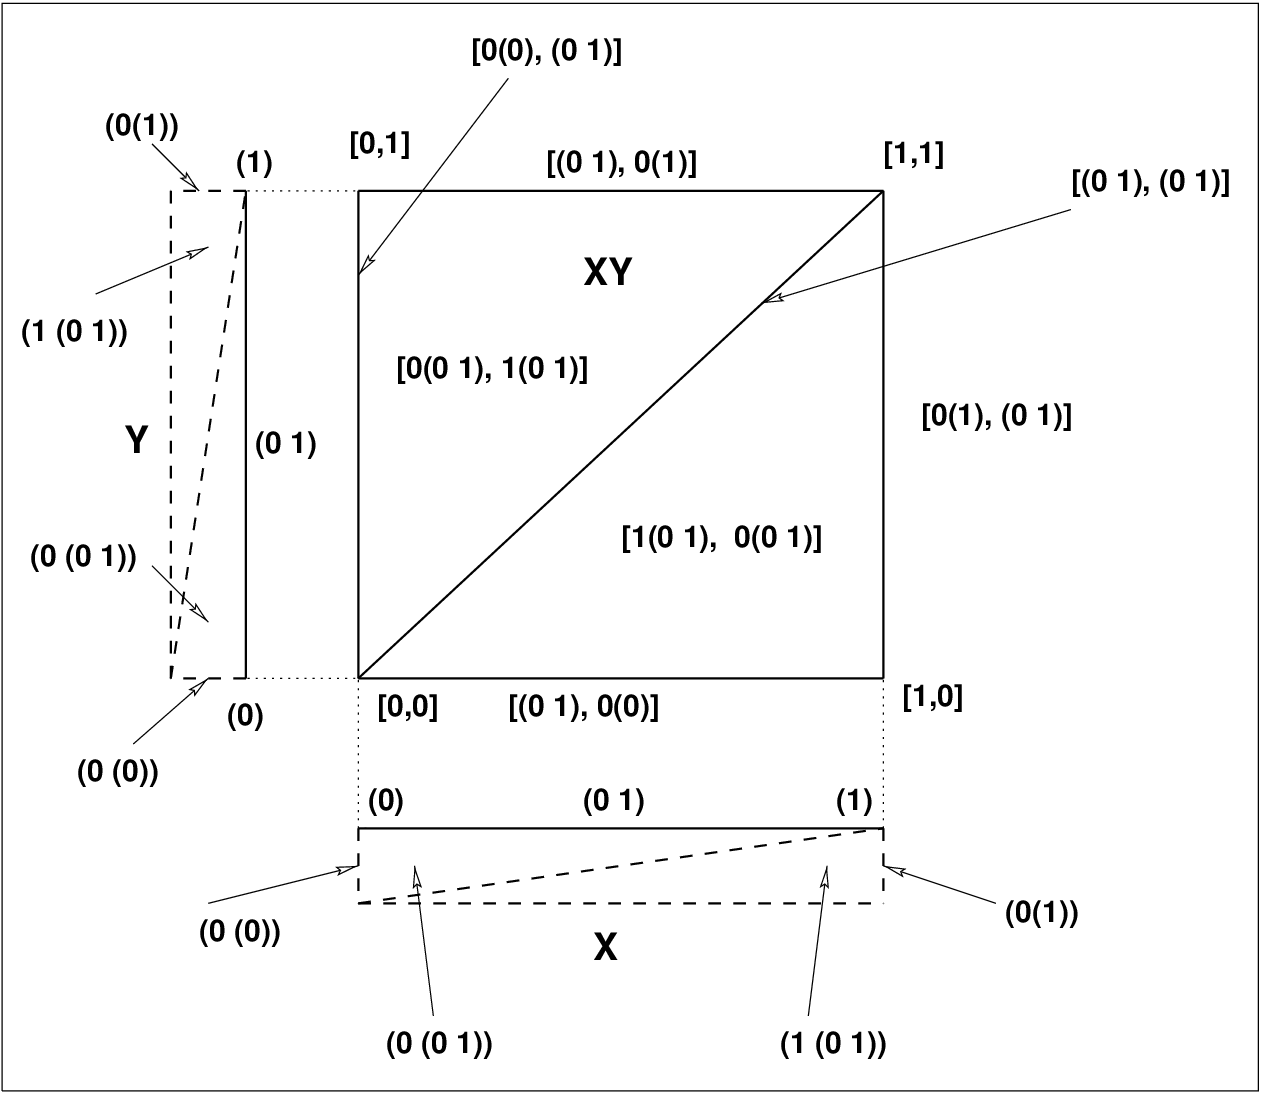

In [130]:
(cl-jupyter-user:png-from-file "ssquare.png")

In list representation (non-coded simplices), the  abstract simplices of $X$ up to the dimension 2, including the degenerate ones are:

- Dimension 0: `<AbSm - (0)>, <AbSm - (1)>`. 
- Dimension 1: `<AbSm 0 (0)>,  <AbSm 0 (1)>,  <AbSm - (0 1)>`. 
- Dimension 2: `<AbSm 1-0 (0)>, <AbSm 1-0 (1)>,  <AbSm 0 (0 1)>, <AbSm 1 (0 1)>`.

Let us look first at the non-degenerate simplices of the simplicial set $X \times Y$. Those simplices are objects of type `CRPR`. In dimension 1, we see that some projections are degeneracies of vertices and, in dimension 2, the projections are all degeneracies of the 1-simplex `(0 1)` coded as 3. Nevertheless, all the listed simplices are *geometric* simplices (i.e. non-degenerate ones) of the product `XY`. The diagram above shows the relationship between the 3 simplicial sets. 

In [131]:
(def XY (crts-prdc X Y))

[K136 Simplicial-Set]

In [132]:
(show-structure XY 2)



Dimension = 0:

        Vertices :  (<CrPr - 1 - 1> <CrPr - 1 - 2> <CrPr - 2 - 1> <CrPr - 2 - 2>)

Dimension = 1:

        Simplex : <CrPr - 3 - 3>

                Faces : (<AbSm - <CrPr - 2 - 2>> <AbSm - <CrPr - 1 - 1>>)

        Simplex : <CrPr - 3 0 1>

                Faces : (<AbSm - <CrPr - 2 - 1>> <AbSm - <CrPr - 1 - 1>>)

        Simplex : <CrPr - 3 0 2>

                Faces : (<AbSm - <CrPr - 2 - 2>> <AbSm - <CrPr - 1 - 2>>)

        Simplex : <CrPr 0 1 - 3>

                Faces : (<AbSm - <CrPr - 1 - 2>> <AbSm - <CrPr - 1 - 1>>)

        Simplex : <CrPr 0 2 - 3>

                Faces : (<AbSm - <CrPr - 2 - 2>> <AbSm - <CrPr - 2 - 1>>)

Dimension = 2:

        Simplex : <CrPr 0 3 1 3>

                Faces : (<AbSm - <CrPr - 3 0 2>> <AbSm - <CrPr - 3 - 3>> <AbSm - <CrPr 0 1 - 3>>)

        Simplex : <CrPr 1 3 0 3>

                Faces : (<AbSm - <CrPr 0 2 - 3>> <AbSm - <CrPr - 3 - 3>> <AbSm - <CrPr - 3 0 1>>)

NIL

To be more readable we may translate the coded representations of the degeneracy operators and of the simplices in the list representation:

```
Dimension 0 :

        Vertices : (<CrPr - (0) - (0)> 
                    <CrPr - (0) - (1)> 
                    <CrPr - (1) - (0)> 
                    <CrPr - (1) - (1)>)

Dimension 1 :

        Simplex : <CrPr 0 (0) - (0 1)>

                Faces : (<AbSm - <CrPr - (0) - (1)> >
                         <AbSm - <CrPr - (0) - (0)> >)

        Simplex : <CrPr 0 (1) - (0 1)>

                Faces : (<AbSm - <CrPr - (1) - (1)> >
                         <AbSm - <CrPr - (1) - (0)> >)

        Simplex : <CrPr - (0 1) 0 (0)>

                Faces : (<AbSm - <CrPr - (1) - (0)> >
                         <AbSm - <CrPr - (0) - (0)> >)

        Simplex : <CrPr - (0 1) 0 (1)>

                Faces : (<AbSm - <CrPr - (1) - (1)> >
                         <AbSm - <CrPr - (0) - (1)> >)

        Simplex : <CrPr - (0 1) - (0 1)>

                Faces : (<AbSm - <CrPr - (1) - (1)> >
                         <AbSm - <CrPr - (0) - (0)> >)

Dimension 2 :

        Simplex : <CrPr 0 (0 1) 1 (0 1)>

                Faces : (<AbSm - <CrPr - (0 1) 0 (1)> >
                         <AbSm - <CrPr - (0 1) - (0 1)> >
                         <AbSm - <CrPr 0 (0) - (0 1)> >)

        Simplex : <CrPr 1 (0 1) 0 (0 1)>

                Faces : (<AbSm - <CrPr 0 (1) - (0 1)> >
                         <AbSm - <CrPr - (0 1) - (0 1)> >
                         <AbSm - <CrPr - (0 1) 0 (0)> >)
```

In an analogous way, let us build the torus as the cartesian product of two 1-spheres. We recall that the base point of the sphere is named `*`.

In [133]:
(def s1xs1 (crts-prdc (sphere 1) (sphere 1)))

[K146 Simplicial-Set]

In [134]:
(show-structure s1xs1 2)



Dimension = 0:

        Vertices :  (<CrPr - * - *>)

Dimension = 1:

        Simplex : <CrPr - S1 - S1>

                Faces : (<AbSm - <CrPr - * - *>> <AbSm - <CrPr - * - *>>)

        Simplex : <CrPr - S1 0 *>

                Faces : (<AbSm - <CrPr - * - *>> <AbSm - <CrPr - * - *>>)

        Simplex : <CrPr 0 * - S1>

                Faces : (<AbSm - <CrPr - * - *>> <AbSm - <CrPr - * - *>>)

Dimension = 2:

        Simplex : <CrPr 0 S1 1 S1>

                Faces : (<AbSm - <CrPr - S1 0 *>> <AbSm - <CrPr - S1 - S1>> <AbSm - <CrPr 0 * - S1>>)

        Simplex : <CrPr 1 S1 0 S1>

                Faces : (<AbSm - <CrPr 0 * - S1>> <AbSm - <CrPr - S1 - S1>> <AbSm - <CrPr - S1 0 *>>)

NIL

Let us verify that  $S^1\times S^1$ has  the same  homology groups as the torus.

In [135]:
(dotimes (i 3)(chcm-homology s1xs1 i))


Computing boundary-matrix in dimension 0.
Rank of the source-module : 1.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/1 (dimension 0) :
<CrPr - * - *> 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 3.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/3 (dimension 1) :
<CrPr - S1 - S1> 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 2/3 (dimension 1) :
<CrPr - S1 0 *> 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 3/3 (dimension 1) :
<CrPr 0 * - S1> 
End of computing.




Homology in dimension 0 :


Component Z


---done---
Computing boundary-matrix in dimension 1.
Rank of the source-module : 3.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the boundary of the generator 1/3 (dimension 1) :
<CrPr - S1 - S1> 
End of computing.


;; Clock -> 2020-01-18, 16h 1m 43s.
Computing the bou

NIL

Of course, we may generate more complex products, whose basis are composed of rather long
lists of simplices as shown below. The user will also pay attention to the fact that the composition of the macro `crpr` is not associative. In the following example, the simplicial sets located respectively by `p1` and `p2` are different objects, though being canonically isomorphic.

In [136]:
(def p1 (crts-prdc (sphere 2) (crts-prdc (sphere 2) (sphere 3))))

[K156 Simplicial-Set]

In [137]:
(def p2 (crts-prdc (crts-prdc (sphere 2) (sphere 2)) (sphere 3)))

[K166 Simplicial-Set]

In [138]:
(dotimes (i 8) (print (length (basis p1 i))))


1 
0 
3 
22 
138 
390 
480 
210 

NIL

### Lisp files concerned in this chapter

`simplicial-sets.lisp`, `delta.lisp`, `specials-smsts.lisp`, `cartesian-products.lisp`.

[`classes.lisp`, `macros.lisp`, `various.lisp`].